# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.3026,  0.4339,  0.7364,  0.0553,  0.7976,  0.1623,  0.6165,  0.3369,  0.6137,  0.3188,
        0.2377,  0.476 ,  0.0066,  0.4722,  0.9555,  0.1385,  0.3822,  0.9061,  0.1542,  0.6689,
        0.0805,  0.6446,  0.0857,  0.0538,  0.0223,  0.4904,  0.7546,  0.0602,  0.8889,  0.7859])

In [6]:
y

array([  8.9078,   9.3018,  10.2092,   8.166 ,  10.3928,   8.4868,   9.8494,   9.0107,   9.841 ,
         8.9563,   8.7131,   9.4279,   8.0198,   9.4167,  10.8665,   8.4156,   9.1467,  10.7184,
         8.4626,  10.0067,   8.2416,   9.9337,   8.2571,   8.1614,   8.067 ,   9.4712,  10.2639,
         8.1807,  10.6667,  10.3578])

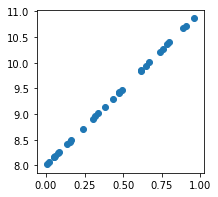

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.7667

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani